# Summarizing and Visualizing 

Let us begin with simple computations in Python using +,-,* and / operators and functions.

In [13]:
import numpy as np
import pandas as pd

weight = np.array([60,72,57,90,95,72])
height = np.array([1.75,1.8,1.65,1.9,1.74,1.91])
gender = np.array(["m","f","m","f","f","m"])
ghw  = pd.DataFrame({"gender":gender,"height":height,"weight":weight})
ghw

,gender,height,weight
0,m,1.75,60
1,f,1.80,72
2,m,1.65,57
3,f,1.90,90
4,f,1.74,95
5,m,1.91,72


In [14]:
ghw.iloc[0,0]

'm'

Commonly used functions like sqrt(),exp(), and log() are made available in the `math` package.

In [15]:
print(ghw.iloc[:,1:3])

   height  weight
0    1.75      60
1    1.80      72
2    1.65      57
3    1.90      90
4    1.74      95
5    1.91      72


In [16]:
ghw.iloc[1:5,:]

,gender,height,weight
1,f,1.80,72
2,m,1.65,57
3,f,1.90,90
4,f,1.74,95


In [17]:
ghw.iloc[:,0]

0    m
1    f
2    m
3    f
4    f
5    m
Name: gender, dtype: object

In [18]:
ghw.iloc[[0,2,5],1:3]

,height,weight
0,1.75,60
2,1.65,57
5,1.91,72


In [19]:
x = ghw.iloc[0:3,:]
x.shape

(3, 3)

In [20]:
0/0

ZeroDivisionError: division by zero

In [21]:
y = 0
0 if y == 0 or np.isnan(y) else x/y 
#0 if y == 0  else x/y

0

In [22]:
df = pd.DataFrame({'a': [0,-1], 'b': [2,3]})
print(df)
df /= 0
print(df)

   a  b
0  0  2
1 -1  3
     a    b
0  NaN  inf
1 -inf  inf


In [23]:
df['a'].isna()

0     True
1    False
Name: a, dtype: bool

In [24]:
df = pd.DataFrame({'a': [1,2], 'b': [3,4]})
display(df)
df2 = df.reindex(['x'])
df2

,a,b
0,1,3
1,2,4


,a,b
x,NaN,NaN


In [25]:
x = True
not not 2<=2

True

## Specifiying Conditions

In [26]:
student = pd.read_csv("../data/student.csv")
student.head()

,id,gender,math,prog,daysabs
0,1001,0,63,2,4
1,1002,0,27,2,4
2,1003,1,20,2,2
3,1004,1,16,2,3
4,1005,1,2,2,3


In [27]:
x1 = student[student['daysabs']==0]
print(x1.head())

      id  gender  math  prog  daysabs
15  1016       0    89     2        0
17  1018       1    35     2        0
21  1022       0    61     2        0
23  1024       0    63     2        0
27  1028       1    21     2        0


In [28]:
x2 = student[(student['daysabs']==0) & (student['math']>60)]
print(x2.head())

      id  gender  math  prog  daysabs
15  1016       0    89     2        0
21  1022       0    61     2        0
23  1024       0    63     2        0
34  1035       0    68     2        0
70  1071       0    72     2        0


In [29]:
f1 = (student['gender']==0) & (student['prog']==3) & (student['math']>60)
f1

0      False
1      False
2      False
3      False
4      False
       ...  
309    False
310    False
311    False
312    False
313    False
Length: 314, dtype: bool

In [30]:
x3 = student[f1]
print(x3.head())

       id  gender  math  prog  daysabs
88   1089       0    84     3        4
164  2007       0    71     3        0
166  2009       0    71     3        0
168  2011       0    77     3        2
172  2015       0    65     3        1


## Factor Variables

In [31]:
arthritis = pd.read_csv("../data/Arthritis.csv")
arthritis.head()

,Unnamed: 0,ID,Treatment,Sex,Age,Improved
0,1,57,Treated,Male,27,Some
1,2,46,Treated,Male,29,None
2,3,77,Treated,Male,30,None
3,4,17,Treated,Male,32,Marked
4,5,36,Treated,Male,46,Marked


In [32]:
arthritis['Sex'].value_counts()

Female    59
Male      25
Name: Sex, dtype: int64

In [33]:
arthritis[['Treatment','Improved']].value_counts().unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,7,29,7
Treated,21,13,7


In [34]:
arthritis[['Treatment','Improved']].value_counts(normalize=True).unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,0.083333,0.345238,0.083333
Treated,0.250000,0.154762,0.083333


In [35]:
arthritis.groupby('Improved')['Treatment'].value_counts(normalize=True).unstack()

Treatment,Placebo,Treated
Improved,,
Marked,0.250000,0.750000
None,0.690476,0.309524
Some,0.500000,0.500000


In [36]:
arthritis.groupby('Treatment')['Improved'].value_counts(normalize=True).unstack()

Improved,Marked,None,Some
Treatment,,,
Placebo,0.162791,0.674419,0.162791
Treated,0.512195,0.317073,0.170732


In [37]:
df3 = arthritis[['Sex','Treatment','Improved']].value_counts().unstack()[['None','Some','Marked']]
df3

Improved          None  Some  Marked
Sex    Treatment                    
Female Placebo    19.0   7.0     6.0
       Treated     6.0   5.0    16.0
Male   Placebo    10.0   NaN     1.0
       Treated     7.0   2.0     5.0

In [38]:
#df4 = df3.reset_index(level='Improved')
#display(df4)
df4 = df3.unstack()
df4

Improved     None            Some          Marked        
Treatment Placebo Treated Placebo Treated Placebo Treated
Sex                                                      
Female       19.0     6.0     7.0     5.0     6.0    16.0
Male         10.0     7.0     NaN     2.0     1.0     5.0

## Numeric Variables

In [39]:
whiteside = pd.read_csv('../data/whiteside.csv',index_col=0)
whiteside.head()

,Temp,Gas
Insul,,
Before,-0.8,7.2
Before,-0.7,6.9
Before,0.4,6.4
Before,2.5,6.0
Before,2.9,5.8


In [40]:
whiteside.groupby(['Insul'])['Temp'].agg(np.mean)

Insul
After     4.463333
Before    5.350000
Name: Temp, dtype: float64

In [41]:
whiteside.groupby(['Insul'])['Temp'].mean()

Insul
After     4.463333
Before    5.350000
Name: Temp, dtype: float64

## Pandas Graph plotting with matplotlib and seaborn

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
whiteside = pd.read_csv('../data/whiteside.csv')
whiteside.head()

,Insul,Temp,Gas
0,Before,-0.8,7.2
1,Before,-0.7,6.9
2,Before,0.4,6.4
3,Before,2.5,6.0
4,Before,2.9,5.8


***Bar graph: part1***

In [44]:
g = whiteside.groupby(['Insul'])['Temp'].count().sort_values().reset_index()
g.rename(columns={'Temp':'count'}, inplace=True)
g

,Insul,count
0,Before,26
1,After,30


[]

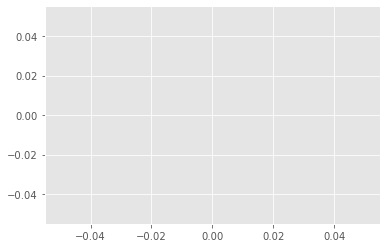

In [45]:
plt.style.use('ggplot')
plt.plot()

<BarContainer object of 2 artists>

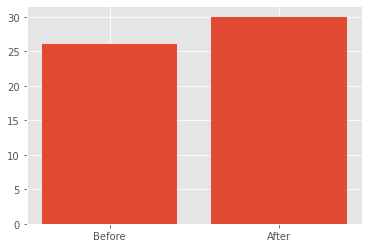

In [46]:
plt.bar(g['Insul'], g['count'])

<BarContainer object of 2 artists>

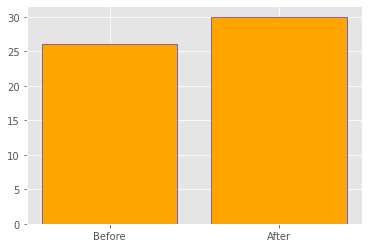

In [47]:
plt.bar(g['Insul'], g['count'], edgecolor='blue', color='orange')

<BarContainer object of 2 artists>

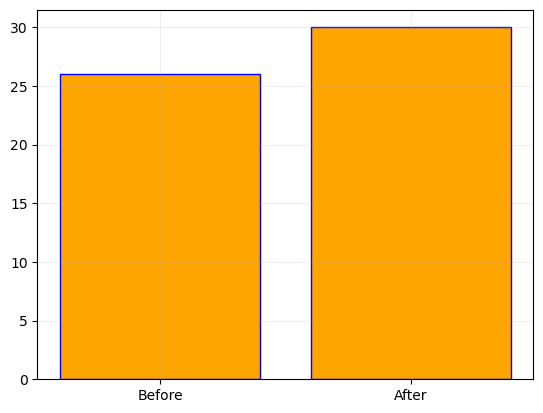

In [48]:
plt.style.use('default')
plt.grid(alpha=.2)
plt.bar(g['Insul'], g['count'], edgecolor='blue', color='orange')

Text(0.5, 0, 'count')

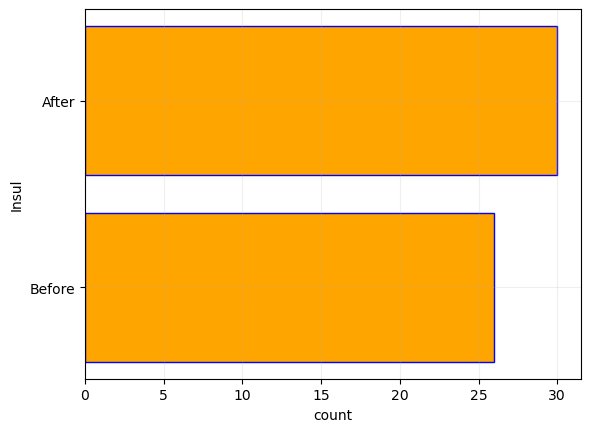

In [49]:
plt.grid(alpha=.2)
plt.barh(g['Insul'], g['count'], edgecolor='blue', color='orange')
plt.ylabel('Insul')
plt.xlabel('count')

***Scatter plot: using dots***

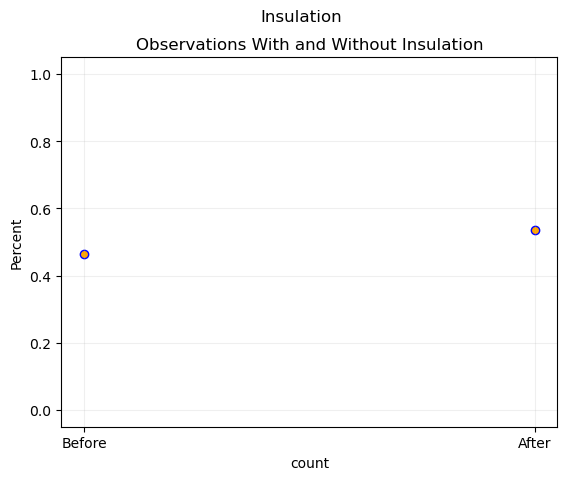

In [50]:
g['percent'] = g['count'].div(g['count'].sum())

fig = plt.figure()
fig.suptitle('Insulation')
ax = plt.subplot(111)
ax.grid(alpha=.2)
ax.set_title('Observations With and Without Insulation')
ax.scatter(g['Insul'], g['percent'], edgecolor='blue', color='orange')
ax.set_ylim([-.05, 1.05])
ax.set_ylabel('Percent')
ax.set_xlabel('count')
plt.show()

***Histogram***

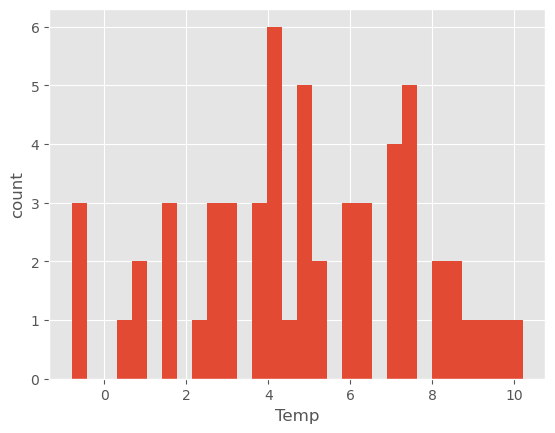

In [51]:
plt.style.use('ggplot')
plt.hist(whiteside['Temp'], bins=30)
plt.ylabel('count')
plt.xlabel('Temp')
plt.show()

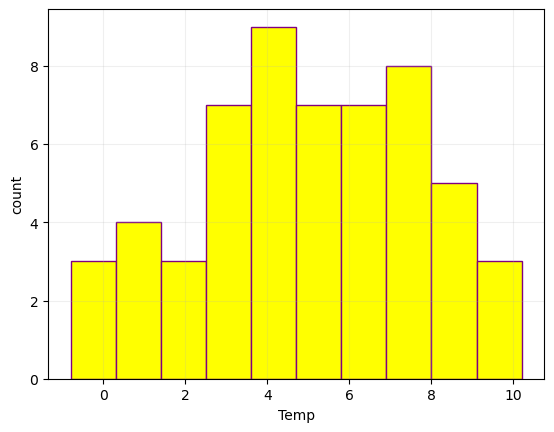

In [52]:
plt.style.use('default')
plt.grid(alpha=.2)
plt.hist(whiteside['Temp'], bins=10, edgecolor='purple', color='yellow')
plt.ylabel('count')
plt.xlabel('Temp')
plt.show()

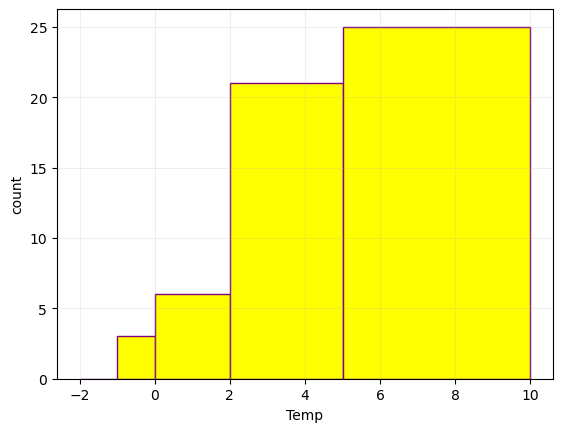

In [53]:
plt.grid(alpha=.2)
plt.hist(whiteside['Temp'], bins=[-2,-1,0,2,5,10], edgecolor='purple', color='yellow')
plt.ylabel('count')
plt.xlabel('Temp')
plt.show()

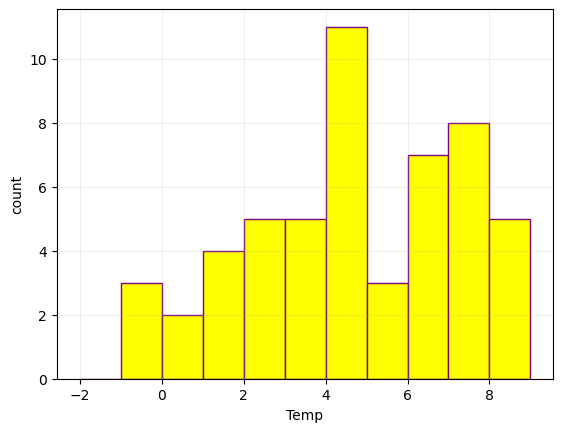

In [54]:
plt.grid(alpha=.2)
plt.hist(whiteside['Temp'], bins=range(-2, 10, 1), edgecolor='purple', color='yellow')
plt.ylabel('count')
plt.xlabel('Temp')
plt.show()

***Density plot - part1***

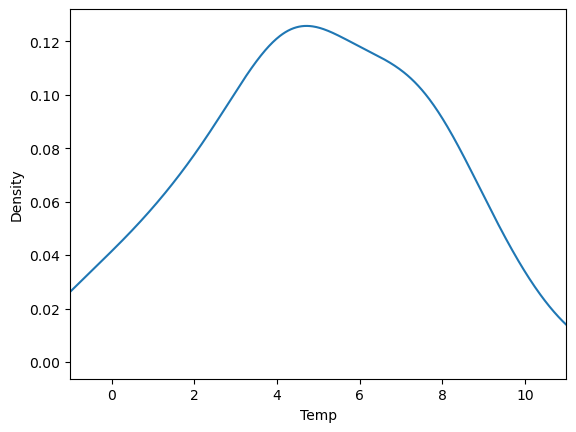

In [55]:
ax = whiteside['Temp'].plot(kind='density')
ax.set_xlim(-1, 11)
plt.xlabel('Temp')
plt.show()

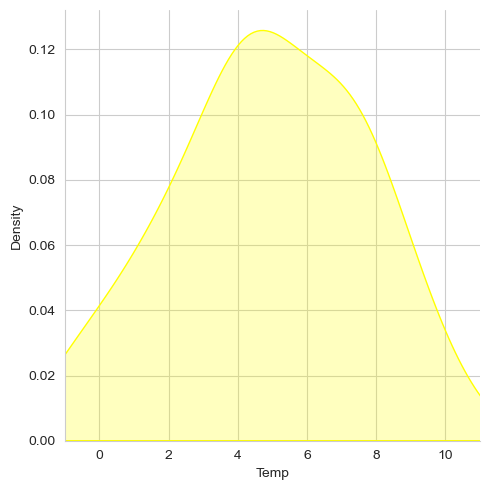

In [56]:
sns.set_style("whitegrid")
ax = sns.displot(whiteside['Temp'], kind = 'kde', color = 'yellow', fill='y')
ax.set(xlim=(-1, 11))
plt.xlabel('Temp')
plt.show()

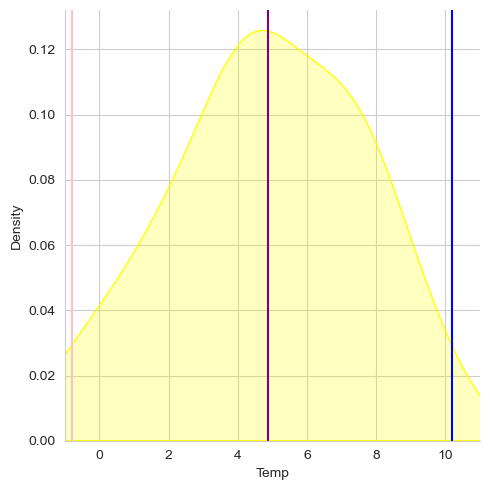

In [57]:
maxtemp = whiteside['Temp'].max()
mintemp = whiteside['Temp'].min()
meantemp = whiteside['Temp'].mean()

ax = sns.displot(whiteside['Temp'], kind = 'kde', color = 'yellow', fill='y')
plt.axvline(maxtemp, color='blue')
plt.axvline(mintemp, color='pink')
plt.axvline(meantemp, color='purple')
ax.set(xlim=(-1, 11))
plt.xlabel('Temp')
plt.show()

***boxplot***

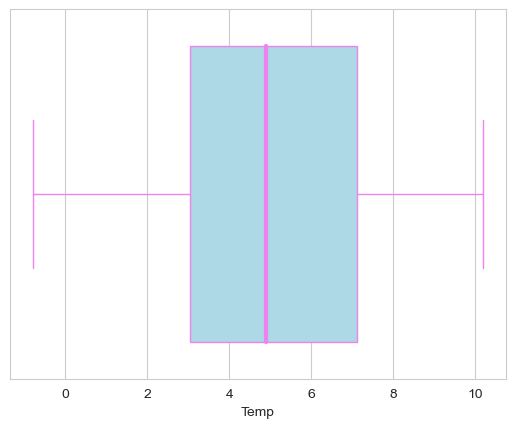

In [58]:
ax = sns.boxplot(x=whiteside['Temp'], linewidth=1, \
                boxprops=dict(facecolor='lightblue', edgecolor='violet'), \
                medianprops=dict(linewidth=3, color='violet'), \
                whiskerprops=dict(color='violet'), \
                capprops=dict(color='violet'))

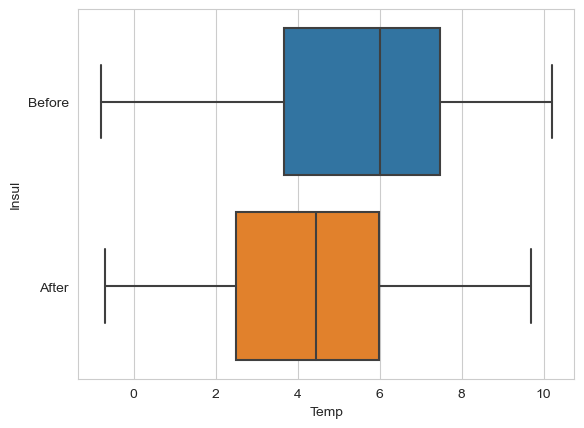

In [59]:
ax = sns.boxplot(x='Temp', y='Insul', data=whiteside)

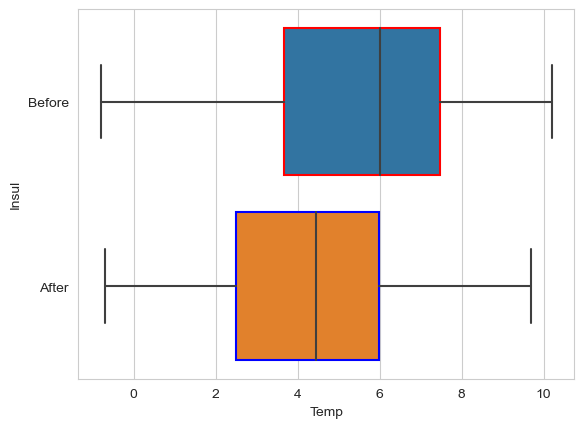

In [60]:
ax = sns.boxplot(x='Temp', y='Insul', data=whiteside)
box_before = ax.patches[0]
box_after = ax.patches[1]
box_before.set_edgecolor('red')
box_after.set_edgecolor('blue')
plt.show()

***Density plot - part2***

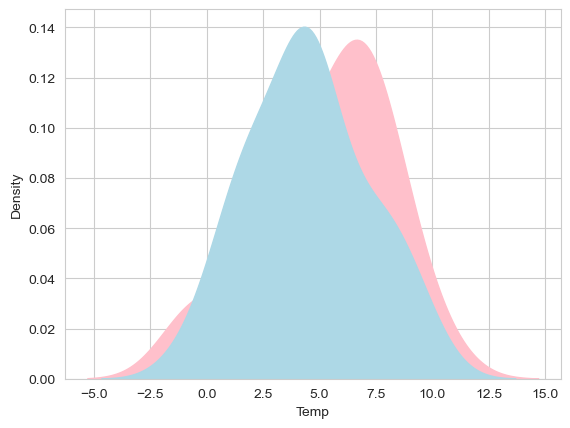

In [61]:
fig = sns.kdeplot(whiteside.loc[whiteside['Insul'] == 'Before']['Temp'], color="pink", shade=True, alpha=1)
fig = sns.kdeplot(whiteside.loc[whiteside['Insul'] == 'After']['Temp'], color="lightblue", shade=True, alpha=1)
plt.show()

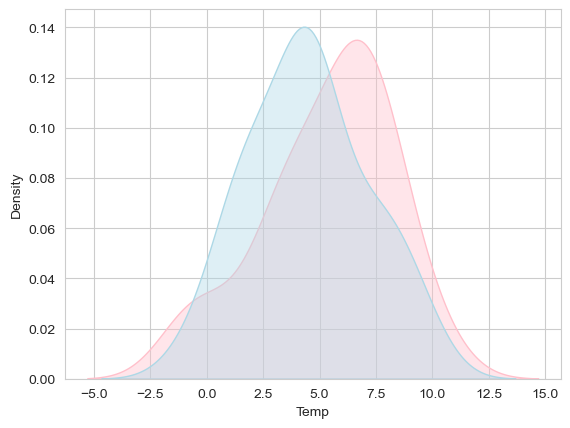

In [62]:
fig = sns.kdeplot(whiteside.loc[whiteside['Insul'] == 'Before']['Temp'], color="pink", shade=True, alpha=.4)
fig = sns.kdeplot(whiteside.loc[whiteside['Insul'] == 'After']['Temp'], color="lightblue", shade=True, alpha=.4)
plt.show()

***Scatter plot: with linear line***

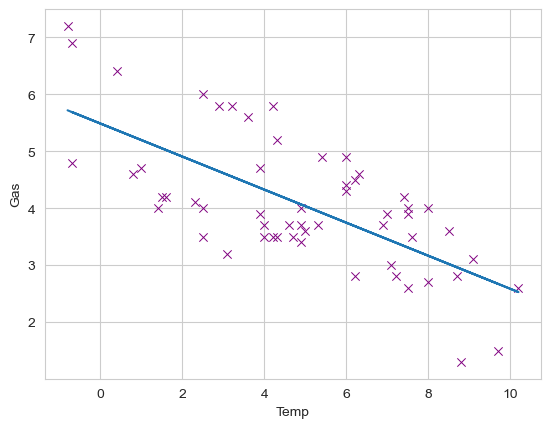

In [63]:
x = whiteside['Temp']
y = whiteside['Gas']
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
plt.scatter(x, y, linewidths=.7, color='purple', marker='x')
plt.ylabel('Gas')
plt.xlabel('Temp')
plt.show()

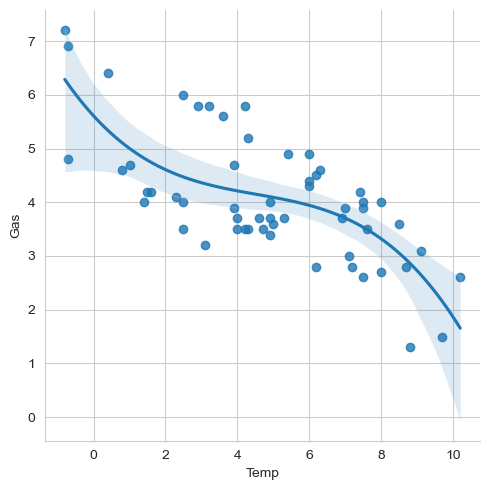

In [64]:
sns.lmplot(x='Temp', y='Gas', data=whiteside, order=3)
plt.show()

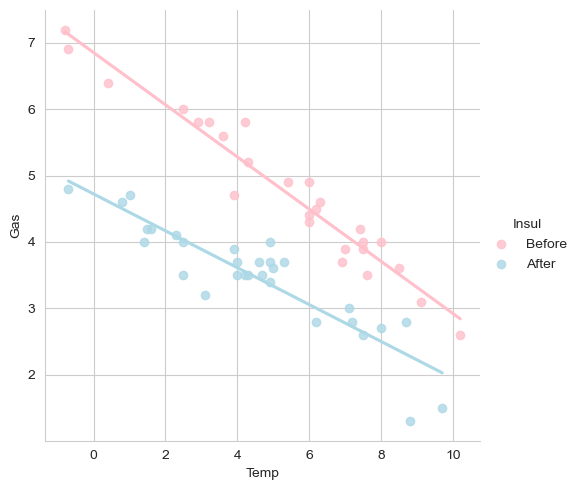

In [65]:
sns.lmplot(x='Temp', y='Gas', hue='Insul', data=whiteside, palette=['pink','lightblue'], ci=None)
plt.show()

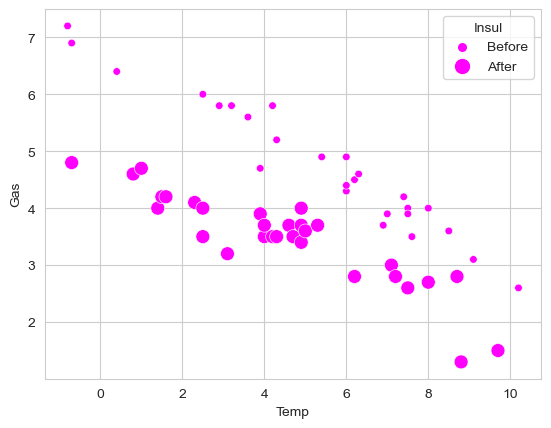

In [66]:
sns.scatterplot(x='Temp', y='Gas', hue='Insul', data=whiteside, palette=['magenta','magenta'], size='Insul', sizes=(100,30))
plt.show()

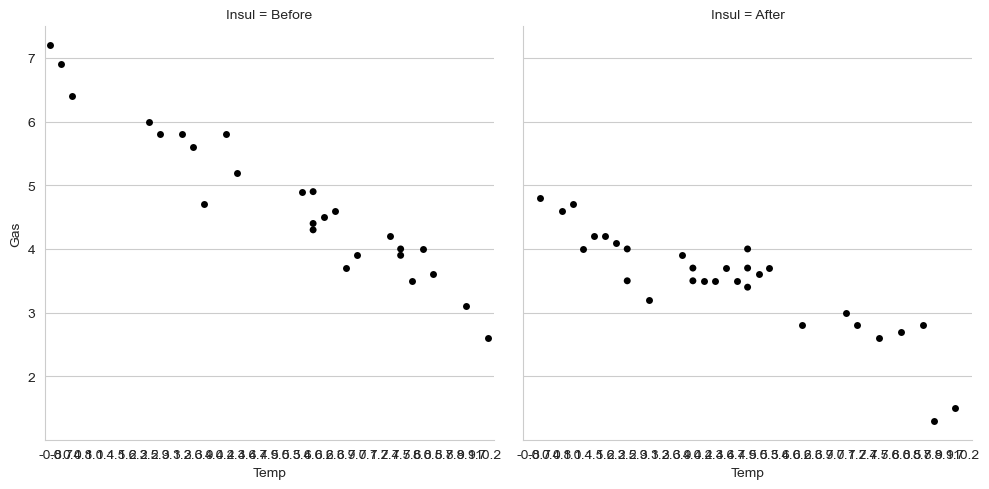

In [67]:
sns.catplot(x='Temp', y='Gas', col='Insul', data=whiteside, kind='swarm', palette=['black','black'], dodge=True)

***Bar graph: part2***

In [68]:
mpg = pd.read_csv("../data/mpg.csv", index_col=0)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [69]:
g = mpg.groupby(['class'])['drv'].count().reset_index()
g.rename(columns={'drv':'count'}, inplace=True)
g

,class,count
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


<BarContainer object of 7 artists>

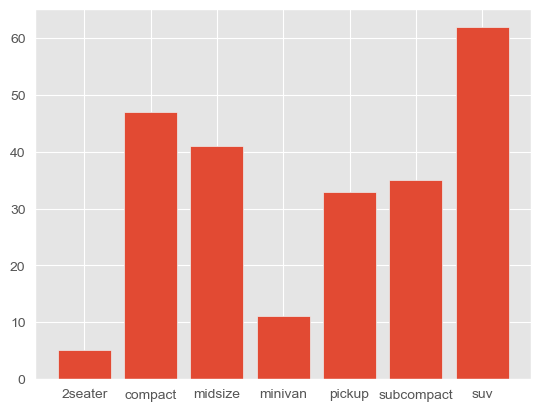

In [70]:
plt.style.use('ggplot')
plt.bar(g['class'], g['count'])

<AxesSubplot:xlabel='class', ylabel='Count'>

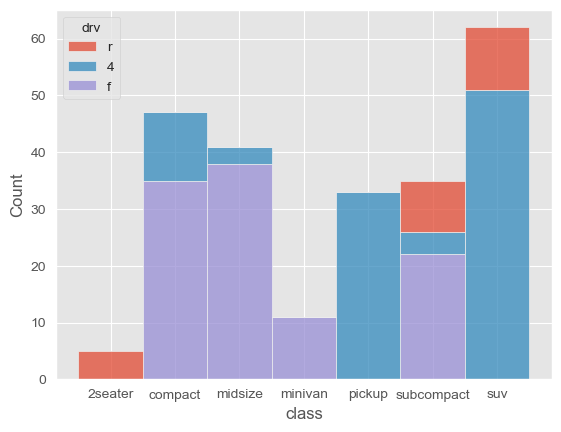

In [71]:
sns.histplot(mpg.sort_values(by=['class','drv']), x='class', hue='drv', multiple='stack')

<AxesSubplot:xlabel='class', ylabel='Count'>

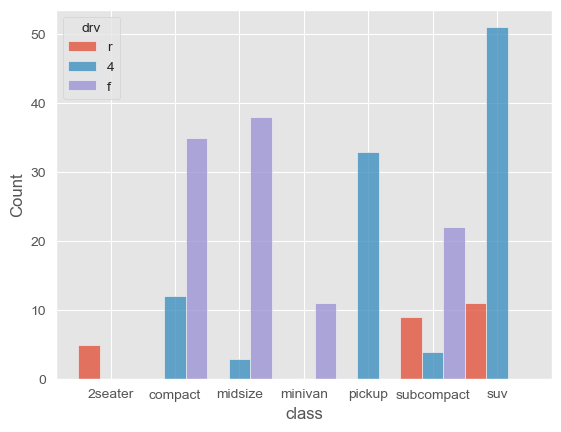

In [72]:
sns.histplot(mpg.sort_values(by=['class','drv']), x='class', hue='drv', multiple='dodge')

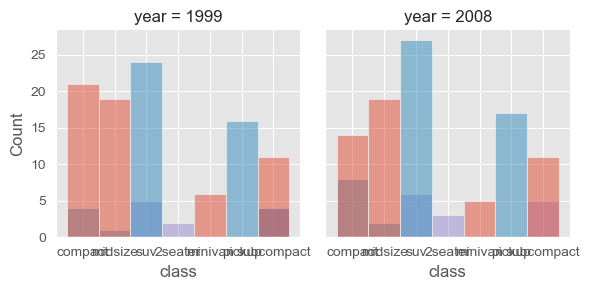

In [74]:
g = sns.FacetGrid(mpg, col="year")
g.map_dataframe(sns.histplot, x="class",hue='drv')

<IPython.core.display.Javascript object>


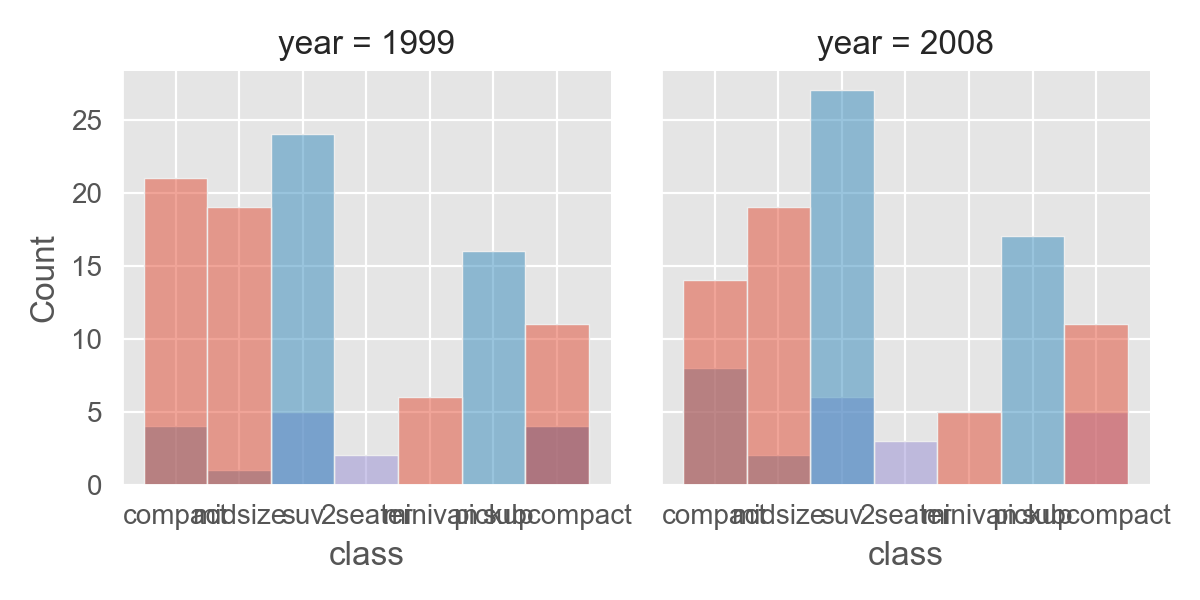

In [77]:
%matplotlib notebook
plt.ion()
g = sns.FacetGrid(mpg, col="year")
g.map_dataframe(sns.histplot, x="class",hue='drv')